### Parte 1 Infraestrutura

Importando a biblioteca

In [1]:
import subprocess
import sys

# Lista de pacotes a serem instalados
packages = [
    "matplotlib",
    "numpy",
    "pandas",
    "scipy",
    "seaborn",
    "scikit-learn",
    "pyautogui"
]

# Função para instalar pacotes
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Verificar e instalar pacotes
for package in packages:
    try:
        __import__(package)
        print(f"{package} já está instalado.")
    except ImportError:
        print(f"{package} não está instalado. Instalando...")
        install_package(package)


matplotlib já está instalado.
numpy já está instalado.
pandas já está instalado.
scipy já está instalado.
seaborn já está instalado.
scikit-learn não está instalado. Instalando...
pyautogui já está instalado.


In [2]:
# Importar os pacotes
import sys
import subprocess
import pyautogui
import os
import numpy as np
import pandas as pd
import pkg_resources
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min, r2_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



C:\Users\Caio Barroso\AppData\Local\Temp\ipykernel_26008\2853008850.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Você está rodando em Python 3.9+

In [3]:
print("Versão do Python:", sys.version)

Versão do Python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]


Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [4]:
print("Ambiente virtual ativo:", sys.prefix)

Ambiente virtual ativo: c:\Users\Caio Barroso\python


Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [5]:
# Gera o arquivo requirements.txt com os pacotes instalados
with open("requirements.txt", "w") as file:
    subprocess.run(["python", "-m", "pip", "freeze"], stdout=file)

print("Arquivo requirements.txt gerado com sucesso.")


Arquivo requirements.txt gerado com sucesso.


Tire um printscreen do ambiente que será usado rodando em sua máquina.

In [6]:
# Tira o print da tela e salva no arquivo screenshot.png
screenshot = pyautogui.screenshot()
screenshot.save("screenshot.png")

print("Screenshot salva como 'screenshot.png'")


Screenshot salva como 'screenshot.png'


Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

In [7]:
print('link para o GITHUB: https://github.com/CBarrosoBRRJ/Algoritmos_de_Inteligencia_Artificial_para_Clusterizacao')

link para o GITHUB: https://github.com/CBarrosoBRRJ/Algoritmos_de_Inteligencia_Artificial_para_Clusterizacao


### Parte 2 Escolha de base de dados

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [8]:
df = pd.read_csv('DATA\Country-data.csv', encoding='latin-1', on_bad_lines='skip', sep=',')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Caio Barroso\AppData\Local\Temp\ipykernel_26008\2434643470.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('DATA\Country-data.csv', encoding='latin-1', on_bad_lines='skip', sep=',')


In [9]:
colunas_traduzidas = [
    'país', 'mortalidade_infantil', 'exportações', 'saúde', 'importações', 
    'renda', 'inflação', 'expectativa_de_vida', 'taxa_fertilidade', 'PIB'
]


In [10]:
# Atualiza o DataFrame com os novos nomes de coluna:
df.columns = colunas_traduzidas

In [11]:
# Verificar o tamanho geral do dataset e se há duplicadas
print(f"O Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print(f"O Dataset possui {df.duplicated().sum()} linhas duplicadas.")

O Dataset possui 167 linhas e 10 colunas.
O Dataset possui 0 linhas duplicadas.


Quantos países existem no dataset?

In [12]:
# Ver os valores únicos na coluna 'country'
unique_countries = df['país'].unique()

# Quantificar o número de países únicos
num_countries = df['país'].nunique()
print(f"Quantidade de países no dataset: {num_countries}")


Quantidade de países no dataset: 167


Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [13]:
#Carregar variaveis para plot
variaveis_numericas = []

for i in df.columns[0:11].to_list():
    if df.dtypes[i] == "int64" or df.dtypes[i] == "float64":
        variaveis_numericas.append(i)

In [14]:
# Configurando o tamanho da figura
plt.rcParams['figure.figsize'] = [20.00, 4.00]
plt.rcParams['figure.autolayout'] = True

# Criando os subplots para cada variável numérica
f, axes = plt.subplots(1, len(variaveis_numericas))

# Iterando sobre as variáveis numéricas e os eixos correspondentes
for idx, i in enumerate(variaveis_numericas):
    sns.boxplot(data=df, y=i, ax=axes[idx], color='#264653')

plt.show()


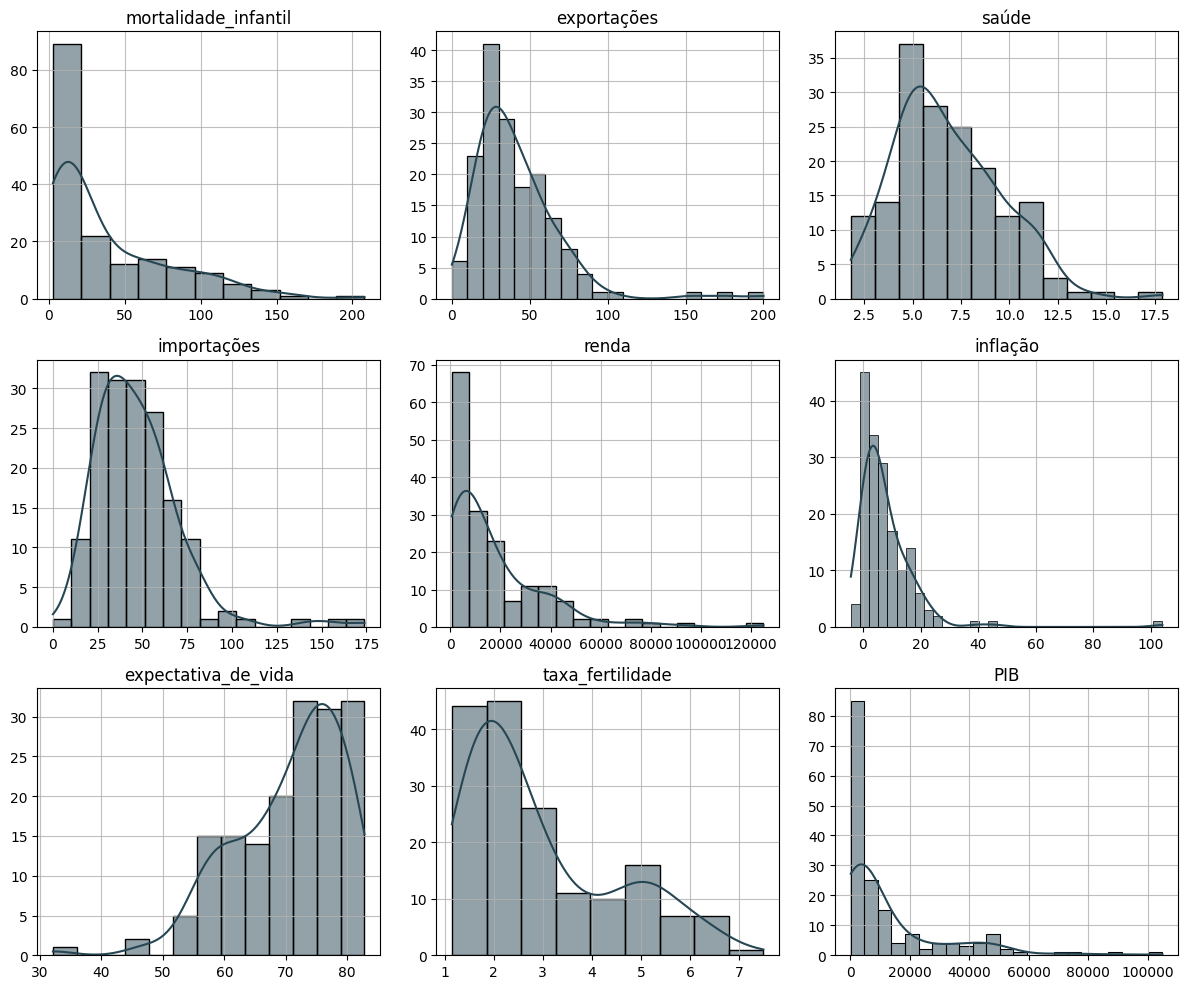

In [15]:
# Selecionar as colunas numéricas
col_num = df.columns[1:]

# Configurar o fundo
plt.subplots(nrows=3, ncols=3, figsize=(12,10))

# Plotar os gráficos das colunas numéricas
for i in range(9):
    plt.subplot(3, 3, (i+1))
    sns.histplot(df[col_num[i]], color='#264653', kde=True).set(title=col_num[i])

    plt.xlabel ('')
    plt.ylabel ('')
    plt.grid(True, alpha=0.8)

# Garatir que não haja sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [16]:
print('''
      É possível notar que, ao isolar os 10 países que possuem a expectativa de vida e a renda per capta abaixo do primeiro quarter, já encontramos similaridades entre eles como a República Central Africana, Moçambique e Malawi
      ''')


      É possível notar que, ao isolar os 10 países que possuem a expectativa de vida e a renda per capta abaixo do primeiro quarter, já encontramos similaridades entre eles como a República Central Africana, Moçambique e Malawi
      


In [17]:
maior_mortalidade = df[df['expectativa_de_vida'] < 65].sort_values(by='expectativa_de_vida', ascending=True)
print("Países com as menores expectativas de vida")
print(maior_mortalidade[['país', 'expectativa_de_vida']].head(10))

Países com as menores expectativas de vida
                         país  expectativa_de_vida
66                      Haiti                 32.1
87                    Lesotho                 46.5
31   Central African Republic                 47.5
166                    Zambia                 52.0
94                     Malawi                 53.1
137              South Africa                 54.3
106                Mozambique                 54.5
132              Sierra Leone                 55.0
64              Guinea-Bissau                 55.6
0                 Afghanistan                 56.2


In [18]:
maior_inflação = df[df['renda'] < 2000].sort_values(by='renda', ascending=True)
print("Países com as menores rendas per captas")
print(maior_inflação[['país', 'renda']].head(10))

Países com as menores rendas per captas
                         país  renda
37           Congo, Dem. Rep.    609
88                    Liberia    700
26                    Burundi    764
112                     Niger    814
31   Central African Republic    888
106                Mozambique    918
94                     Malawi   1030
63                     Guinea   1190
150                      Togo   1210
132              Sierra Leone   1220


Realize o pré-processamento adequado dos dados.

In [19]:
df.head()

país  mortalidade_infantil  exportações  saúde  importações  \
0          Afghanistan                  90.2         10.0   7.58         44.9   
1              Albania                  16.6         28.0   6.55         48.6   
2              Algeria                  27.3         38.4   4.17         31.4   
3               Angola                 119.0         62.3   2.85         42.9   
4  Antigua and Barbuda                  10.3         45.5   6.03         58.9   

   renda  inflação  expectativa_de_vida  taxa_fertilidade    PIB  
0   1610      9.44                 56.2              5.82    553  
1   9930      4.49                 76.3              1.65   4090  
2  12900     16.10                 76.5              2.89   4460  
3   5900     22.40                 60.1              6.16   3530  
4  19100      1.44                 76.8              2.13  12200

In [20]:
# Inicializar listas para cada tipo de dado
float_cols = []
int_cols = []
string_cols = []
object_cols = []
bool_cols = []
datetime_cols = []

In [21]:
# Iterar sobre as colunas do DataFrame e verificar os tipos
for col in df.columns:
    if pd.api.types.is_float_dtype(df[col]):
        float_cols.append(col)
    elif pd.api.types.is_integer_dtype(df[col]):
        int_cols.append(col)
    elif pd.api.types.is_string_dtype(df[col]):
        string_cols.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        object_cols.append(col)
    elif pd.api.types.is_bool_dtype(df[col]):
        bool_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols.append(col)

In [22]:
# Exibir as listas
print("Colunas float:", float_cols)
print("Colunas int:", int_cols)
print("Colunas string:", string_cols)
print("Colunas object:", object_cols)
print("Colunas bool:", bool_cols)
print("Colunas datetime:", datetime_cols)

Colunas float: ['mortalidade_infantil', 'exportações', 'saúde', 'importações', 'inflação', 'expectativa_de_vida', 'taxa_fertilidade']
Colunas int: ['renda', 'PIB']
Colunas string: ['país']
Colunas object: []
Colunas bool: []
Colunas datetime: []


In [23]:
scaler = StandardScaler()

In [24]:
df[int_cols] = scaler.fit_transform(df[int_cols])
df[float_cols] = scaler.fit_transform(df[float_cols])


In [25]:
# Selecionar as variáveis para o clustering (excluindo 'país' se estiver no DataFrame)
variaveis_clusterizacao = df.drop(columns=['país'])


In [26]:
variaveis_clusterizacao = scaler.fit_transform(variaveis_clusterizacao)


### Parte 3 Clusterização

Realizar o agrupamento dos países em 3 grupos distintos. 

Para tal, use:
K-Médias

In [27]:
# --- K-Médias ---
# Definir o modelo K-Médias com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=10)
df['cluster_kmeans'] = kmeans.fit_predict(variaveis_clusterizacao)

Para tal, use:
K-Médias
Clusterização Hierárquica

In [28]:
# --- Clusterização Hierárquica ---
# Realizar a clusterização hierárquica
linkage_matrix = linkage(variaveis_clusterizacao, method='ward')

# Criar clusters a partir da clusterização hierárquica
df['cluster_hierarquica'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

In [29]:
# Mostrar os primeiros registros com os clusters
print("Dados com os clusters atribuídos:")
display(df.head())

# Comparação e interpretação
print("\nAgrupamento realizado com sucesso usando K-Médias e Clusterização Hierárquica.")
print("- K-Médias: Agrupa os dados em 3 clusters baseando-se na minimização da variância dentro dos clusters.")
print("- Clusterização Hierárquica: Forma uma hierarquia de clusters que pode ser visualizada com o dendograma.")

Dados com os clusters atribuídos:


país  mortalidade_infantil  exportações     saúde  \
0          Afghanistan              1.291532    -1.138280  0.279088   
1              Albania             -0.538949    -0.479658 -0.097016   
2              Algeria             -0.272833    -0.099122 -0.966073   
3               Angola              2.007808     0.775381 -1.448071   
4  Antigua and Barbuda             -0.695634     0.160668 -0.286894   

   importações     renda  inflação  expectativa_de_vida  taxa_fertilidade  \
0    -0.082455 -0.808245  0.157336            -1.619092          1.902882   
1     0.070837 -0.375369 -0.312347             0.647866         -0.859973   
2    -0.641762 -0.220844  0.789274             0.670423         -0.038404   
3    -0.165315 -0.585043  1.387054            -1.179234          2.128151   
4     0.497568  0.101732 -0.601749             0.704258         -0.541946   

        PIB  cluster_kmeans  cluster_hierarquica  
0 -0.679180               1                    2  
1 -0.485623               2                    3  
2 -0.465376               2                    3  
3 -0.516268               1                    3  
4 -0.041817               2                    3


Agrupamento realizado com sucesso usando K-Médias e Clusterização Hierárquica.
- K-Médias: Agrupa os dados em 3 clusters baseando-se na minimização da variância dentro dos clusters.
- Clusterização Hierárquica: Forma uma hierarquia de clusters que pode ser visualizada com o dendograma.


Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

In [30]:


# Supondo que 'variaveis_clusterizacao' seja o DataFrame que você usou para treinar o K-Médias
# e que contém as colunas numéricas selecionadas

# Definir o modelo com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=10)
df['cluster_kmeans'] = kmeans.fit_predict(variaveis_clusterizacao)

# Obter os centroides do K-Médias
centro_kmeans = kmeans.cluster_centers_

# Selecionar apenas as colunas numéricas usadas para o K-Médias
variaveis_numericas = variaveis_clusterizacao

# Encontrar o país mais próximo de cada centróide
mais_proximo, distancia = pairwise_distances_argmin_min(X=centro_kmeans, Y=variaveis_numericas)

# Mapear o país mais próximo de cada centróide
melhor_pais = df.iloc[mais_proximo]

# Exibir os resultados
print("\nPaíses que melhor representam cada agrupamento:")
for cluster in range(3):
    pais = melhor_pais.iloc[cluster]['país']  # Certifique-se de que 'país' seja o nome correto da coluna
    print(f"Cluster {cluster}: {pais}")

# --- Justificativa ---
print("\nJustificativa:")
print("O país que melhor representa cada agrupamento é o mais próximo do centróide do cluster, de acordo com a distância euclidiana calculada. Esses países são representativos porque possuem características numéricas que estão mais próximas das médias do grupo.")



Países que melhor representam cada agrupamento:
Cluster 0: Iceland
Cluster 1: Guinea
Cluster 2: Jamaica

Justificativa:
O país que melhor representa cada agrupamento é o mais próximo do centróide do cluster, de acordo com a distância euclidiana calculada. Esses países são representativos porque possuem características numéricas que estão mais próximas das médias do grupo.


Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

In [31]:

# Definindo a função para plotar o dendrograma
def plot_dendrogram(model, top_n=4, **kwargs):
    # Inicializa a contagem de elementos (países) em cada nó
    n_samples = len(model.labels_)
    counts = np.zeros(model.children_.shape[0])
    
    # Conta o número de elementos para cada nó
    for i, merge in enumerate(model.children_):
        count_1 = 1 if merge[0] < n_samples else counts[merge[0] - n_samples]
        count_2 = 1 if merge[1] < n_samples else counts[merge[1] - n_samples]
        counts[i] = count_1 + count_2

    # Cria a matriz de linkage com as contagens corretas
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Identifica as 4 maiores distâncias e desenha linhas vermelhas
    maiores_distancias = sorted(model.distances_)[-top_n:][::-1]

    # Plota as linhas vermelhas para as maiores distâncias
    for altura in maiores_distancias:
        plt.axhline(y=altura, color='red', linestyle='--', linewidth=1)
        # Ajusta o texto para alinhar exatamente sobre a linha
        plt.text(x=0, y=altura+0.3, s=f"Distância: {altura:.2f}", color='red', va='center', ha='left')

    # Plota o dendrograma
    dendro = dendrogram(linkage_matrix, **kwargs)

# Realizar a clusterização hierárquica
hcluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
hcluster.fit(variaveis_clusterizacao)

# Configuração da figura
plt.figure(figsize=(10, 7))
plt.title('Dendrograma de Clusterização Hierárquica')
plot_dendrogram(hcluster, truncate_mode='lastp', p=10)
plt.xlabel("Número de dados em cada nó (ou índice se não houver parênteses)")
plt.ylabel("Distância Euclidiana")
plt.show()

# --- Interpretação ---
print("\nInterpretação do Dendrograma:")
print("O dendograma representa a hierarquia de agrupamentos formados com base na distância euclidiana entre os países.")
print("Linhas vermelhas pontilhadas indicam as maiores distâncias, destacando onde os agrupamentos são mais distintos.")
print("Podemos usar essas distâncias para decidir o número ideal de clusters com base na hierarquia observada.")



Interpretação do Dendrograma:
O dendograma representa a hierarquia de agrupamentos formados com base na distância euclidiana entre os países.
Linhas vermelhas pontilhadas indicam as maiores distâncias, destacando onde os agrupamentos são mais distintos.
Podemos usar essas distâncias para decidir o número ideal de clusters com base na hierarquia observada.


Compare os dois resultados, aponte as semelhanças e diferenças e interprete.


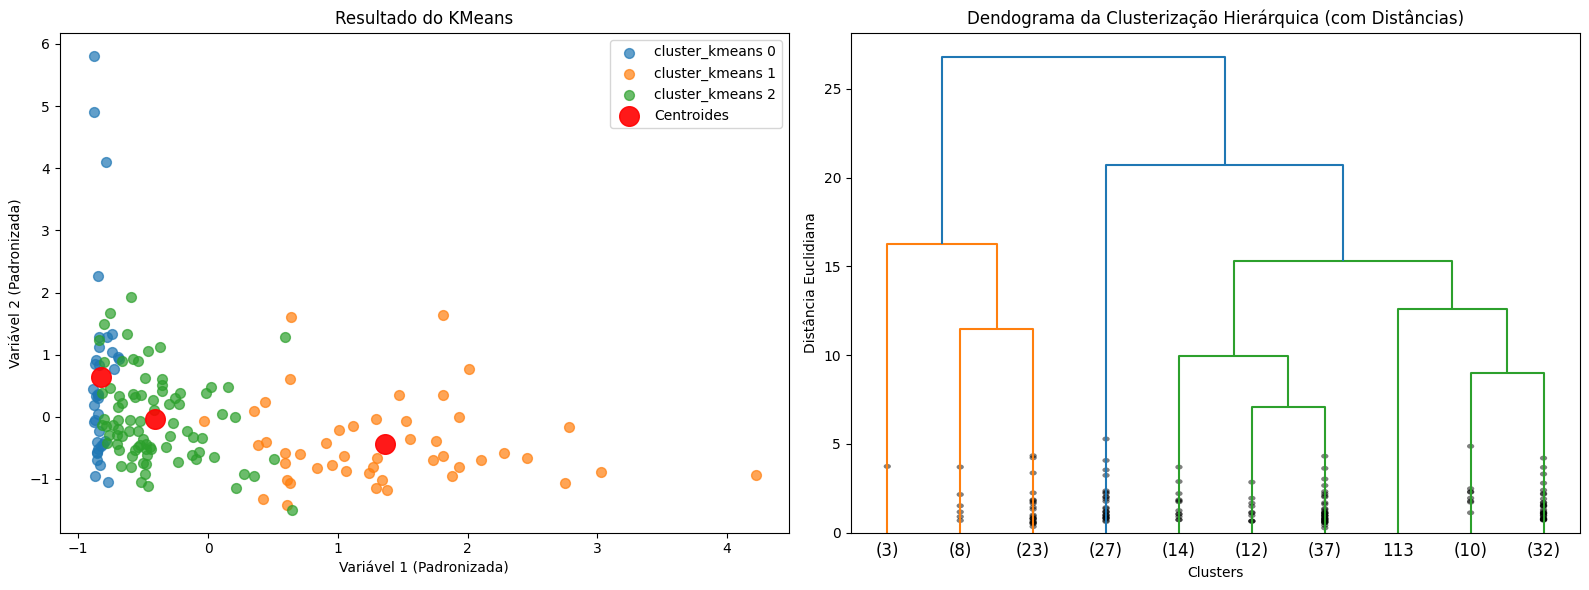

Comparação dos Resultados:
- KMeans: Agrupa os dados em 3 clusters com base na minimização da variância dentro dos clusters.
- Hierárquica: Apresenta a formação dos clusters em um dendograma, permitindo observar a hierarquia e a distância entre os clusters.

Semelhanças:
- Ambos os métodos buscam identificar grupos semelhantes nos dados.

Diferenças:
- KMeans é mais eficiente para conjuntos de dados grandes, mas depende de uma inicialização aleatória e de um número fixo de clusters.
- A Clusterização Hierárquica oferece uma visão mais detalhada da estrutura dos dados, útil para análises exploratórias, mas é menos eficiente para grandes datasets.


In [32]:
# Certifique-se de que variaveis_clusterizacao é um array NumPy
if isinstance(variaveis_clusterizacao, pd.DataFrame):
    variaveis_clusterizacao = variaveis_clusterizacao.values

# Criar a figura com subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Visualização do KMeans
for cluster_num in range(3):
    # Selecionar os índices do DataFrame que pertencem ao cluster atual
    indices = (df['cluster_kmeans'] == cluster_num).values  # Converter para array NumPy se necessário
    # Usar esses índices para selecionar dados do array NumPy
    axes[0].scatter(
        variaveis_clusterizacao[indices, 0],  # Coluna 0
        variaveis_clusterizacao[indices, 1],  # Coluna 1
        label=f"cluster_kmeans {cluster_num}",
        s=50,
        alpha=0.7
    )

# Plotar os centroides do KMeans
centro_kmeans = kmeans.cluster_centers_
axes[0].scatter(centro_kmeans[:, 0], centro_kmeans[:, 1], label='Centroides', color='red', s=200, alpha=0.9)
axes[0].set_title("Resultado do KMeans")
axes[0].set_xlabel("Variável 1 (Padronizada)")
axes[0].set_ylabel("Variável 2 (Padronizada)")
axes[0].legend()

# 3. Clusterização Hierárquica
linkage_matrix = sch.linkage(variaveis_clusterizacao, method='ward')

# Plotar o dendograma com truncamento e distâncias
sch.dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=10,
    show_leaf_counts=True,
    show_contracted=True,
    ax=axes[1]
)
axes[1].set_title("Dendograma da Clusterização Hierárquica (com Distâncias)")
axes[1].set_xlabel("Clusters")
axes[1].set_ylabel("Distância Euclidiana")

# 4. Adicionar linha de corte no dendograma
altura_corte = 150  # Defina a altura da linha de corte conforme necessário
axes[1].axhline(y=altura_corte, color='red', linestyle='--', linewidth=1)

# Mostrar os gráficos lado a lado
plt.tight_layout()
plt.show()

# 5. Comparação e Interpretação
print("Comparação dos Resultados:")
print("- KMeans: Agrupa os dados em 3 clusters com base na minimização da variância dentro dos clusters.")
print("- Hierárquica: Apresenta a formação dos clusters em um dendograma, permitindo observar a hierarquia e a distância entre os clusters.")
print("\nSemelhanças:")
print("- Ambos os métodos buscam identificar grupos semelhantes nos dados.")
print("\nDiferenças:")
print("- KMeans é mais eficiente para conjuntos de dados grandes, mas depende de uma inicialização aleatória e de um número fixo de clusters.")
print("- A Clusterização Hierárquica oferece uma visão mais detalhada da estrutura dos dados, útil para análises exploratórias, mas é menos eficiente para grandes datasets.")


### Parte 04 Escolha de algoritmos

Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

In [33]:
print("""

Etapas do Algoritmo de K-Médias

Inicialização :
    Escolha o número de clusters, k.
    Inicialize kcentroides aleatoriamente ou usando um método como o K-Means++.

Atribuição de Clusters :
    Para cada ponto no conjunto de dados, calcule a distância de cada ponto a todos os centroides.
    Atribuir cada ponto ao cluster cujo centroide é o mais próximo.

Recalcular Centroides :
    Após a atribuição de todos os pontos a clusters, recalcular a posição dos centroides como a média dos pontos em cada cluster.

Convergência :
    Repita as etapas de atribuição e recálculo até que os centroides não mudem significativamente ou até que o número máximo de iterações seja realizado.
    O algoritmo converge quando os centroides permanecem decorrentes ou as mudanças são menores que um limite especificado.


""")



Etapas do Algoritmo de K-Médias

Inicialização :
    Escolha o número de clusters, k.
    Inicialize kcentroides aleatoriamente ou usando um método como o K-Means++.

Atribuição de Clusters :
    Para cada ponto no conjunto de dados, calcule a distância de cada ponto a todos os centroides.
    Atribuir cada ponto ao cluster cujo centroide é o mais próximo.

Recalcular Centroides :
    Após a atribuição de todos os pontos a clusters, recalcular a posição dos centroides como a média dos pontos em cada cluster.

Convergência :
    Repita as etapas de atribuição e recálculo até que os centroides não mudem significativamente ou até que o número máximo de iterações seja realizado.
    O algoritmo converge quando os centroides permanecem decorrentes ou as mudanças são menores que um limite especificado.





O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [34]:

# Supomos que 'variaveis_clusterizacao' seja o DataFrame com os dados numéricos para a clusterização
# Se 'variaveis_clusterizacao' for um subconjunto de 'df', ajuste conforme necessário
variaveis_clusterizacao = df.select_dtypes(include=[np.number])

# Definindo o modelo K-Medoids com 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=7, metric='euclidean', init='k-medoids++' )
df['cluster_kmedoids'] = kmedoids.fit_predict(variaveis_clusterizacao)

# Obter os medóides (os dados que representam melhor cada cluster)
medoids = kmedoids.cluster_centers_

# Exibindo os medóides
print("Medóides (dados que melhor representam cada cluster):")
display(medoids)

# Visualizando a distribuição dos clusters
plt.figure(figsize=(10, 7))
for cluster_num in range(3):
    plt.scatter(
        variaveis_clusterizacao[df['cluster_kmedoids'] == cluster_num].iloc[:, 0],
        variaveis_clusterizacao[df['cluster_kmedoids'] == cluster_num].iloc[:, 1],
        label=f"Cluster {cluster_num}",
        s=50,
        alpha=0.7
    )
# Plotando os medóides
plt.scatter(
    medoids[:, 0],
    medoids[:, 1],
    c='red',
    label='Medóides',
    s=200,
    alpha=0.9
)
plt.title("Resultado do K-Medoids")
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.legend()
plt.show()

# --- Interpretação ---
print("\nInterpretação:")
print("O K-Medoids garante que cada cluster seja representado por um ponto real da base (medóide), diferente do K-Médias que usa o baricentro.")
print("Cada medóide é o dado mais próximo ao centro de seu respectivo cluster, o que torna o algoritmo mais robusto a outliers.")


Medóides (dados que melhor representam cada cluster):


array([[ 1.56013561, -0.35159316, -0.58631709, -0.02859573, -0.84424907,
        -0.01345785, -1.81082483,  1.73061792, -0.68651253,  1.        ,
         2.        ],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713,  2.        ,
         3.        ],
       [-0.22806553, -0.72481193, -0.78714955, -0.84062717, -0.37901089,
         0.21996072, -0.00628079,  0.16036216, -0.56716098,  2.        ,
         3.        ]])


Interpretação:
O K-Medoids garante que cada cluster seja representado por um ponto real da base (medóide), diferente do K-Médias que usa o baricentro.
Cada medóide é o dado mais próximo ao centro de seu respectivo cluster, o que torna o algoritmo mais robusto a outliers.


O algoritmo de K-médias é sensível a outliers nos dados. Explique.

In [35]:
print('''

O algoritmo de K-Médias é sensível a outliers porque ele utiliza o cálculo da média (centróide) para definir o centro de cada cluster.

''')



O algoritmo de K-Médias é sensível a outliers porque ele utiliza o cálculo da média (centróide) para definir o centro de cada cluster.




Por que o algoritmo de DBScan é mais robusto à presença de outliers?

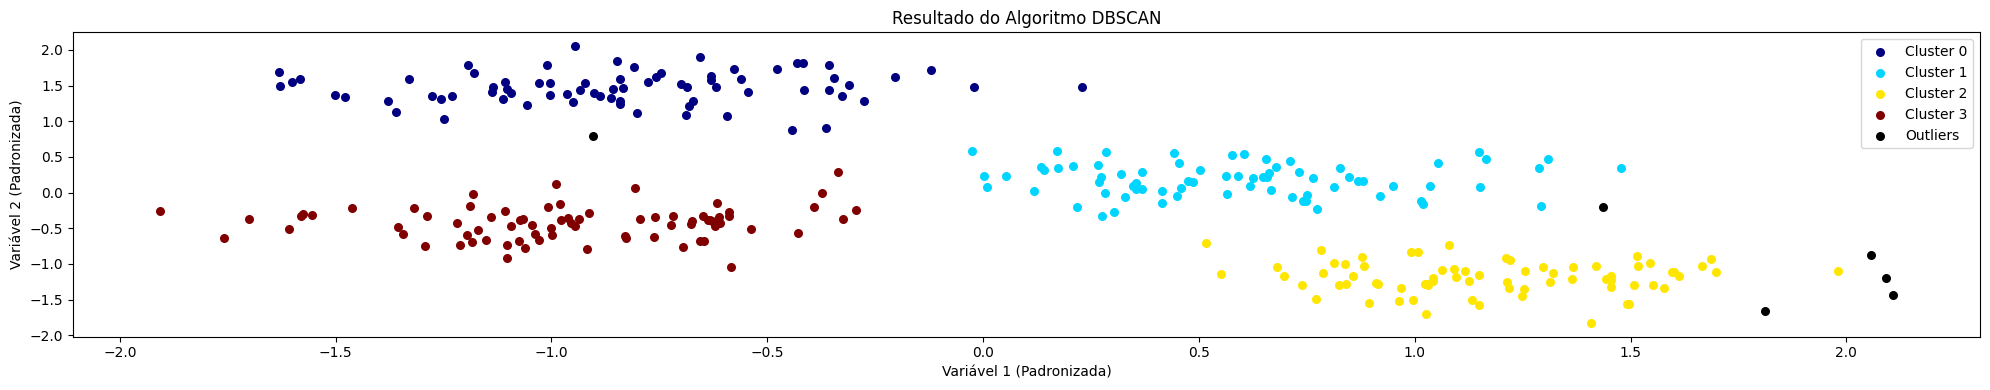

In [36]:

# Gerar dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

X_scaled = scaler.fit_transform(X)

# 1. Inicializar o DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Ajuste os parâmetros conforme necessário

# 2. Ajustar o modelo aos dados
dbscan.fit(X_scaled)

# 3. Obter os rótulos dos clusters
labels = dbscan.labels_

# Visualizar os resultados
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # Outliers são marcados com -1
        color = 'black'
        label_name = 'Outliers'
    else:
        color = plt.cm.jet(float(label) / max(unique_labels))
        label_name = f'Cluster {label}'
    
    plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1], c=[color], label=label_name, s=30)

plt.title("Resultado do Algoritmo DBSCAN")
plt.xlabel("Variável 1 (Padronizada)")
plt.ylabel("Variável 2 (Padronizada)")
plt.legend()
plt.show()


In [37]:
print("""
Por que o algoritmo DBSCAN é mais robusto à presença de outliers?
O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é mais robusto à presença de outliers porque ele usa uma abordagem baseada na densidade para formar clusters. Aqui está uma explicação:

Abordagem Baseada em Densidade:
O DBSCAN agrupa pontos que estão próximos uns dos outros em regiões densas e considera os pontos que não pertencem a essas regiões como ruído (outliers).
Diferente do K-Médias, que tenta ajustar todos os pontos em clusters mesmo que sejam valores atípicos, o DBSCAN naturalmente identifica e ignora os outliers como pontos que não fazem parte de nenhum cluster.

Definição de Clusters e Outliers:
DBSCAN define clusters com base em dois parâmetros: ε (epsilon), que especifica o raio de vizinhança, e min_samples, que define o número mínimo de pontos necessários para formar um cluster.
Pontos que não têm vizinhos suficientes (definidos por min_samples) dentro do raio ε são considerados outliers.

Resistência a Outliers:
Como o DBSCAN ignora pontos que não estão em regiões densas, ele é naturalmente mais resistente a outliers, sem necessidade de tratamento prévio.
""")



Por que o algoritmo DBSCAN é mais robusto à presença de outliers?
O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é mais robusto à presença de outliers porque ele usa uma abordagem baseada na densidade para formar clusters. Aqui está uma explicação:

Abordagem Baseada em Densidade:
O DBSCAN agrupa pontos que estão próximos uns dos outros em regiões densas e considera os pontos que não pertencem a essas regiões como ruído (outliers).
Diferente do K-Médias, que tenta ajustar todos os pontos em clusters mesmo que sejam valores atípicos, o DBSCAN naturalmente identifica e ignora os outliers como pontos que não fazem parte de nenhum cluster.

Definição de Clusters e Outliers:
DBSCAN define clusters com base em dois parâmetros: ε (epsilon), que especifica o raio de vizinhança, e min_samples, que define o número mínimo de pontos necessários para formar um cluster.
Pontos que não têm vizinhos suficientes (definidos por min_samples) dentro do raio ε são considerados outl

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

In [38]:
print('Script Finalizado!!!!')

Script Finalizado!!!!
